# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [15]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [16]:
len(reviews)

25000

In [17]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [18]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [19]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [20]:
from collections import Counter
import numpy as np

In [21]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [26]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [27]:
positive_counts.most_common()

[('', 1651404),
 ('the', 519972),
 ('.', 478962),
 ('and', 269166),
 ('a', 251064),
 ('of', 230565),
 ('to', 200238),
 ('is', 171735),
 ('in', 150645),
 ('br', 147705),
 ('it', 144075),
 ('i', 122229),
 ('that', 106890),
 ('this', 105240),
 ('s', 101445),
 ('as', 78924),
 ('with', 69741),
 ('for', 67248),
 ('was', 65751),
 ('film', 62811),
 ('but', 62466),
 ('movie', 57222),
 ('his', 51681),
 ('on', 51024),
 ('you', 50043),
 ('he', 48846),
 ('are', 44421),
 ('not', 42816),
 ('t', 41160),
 ('one', 40965),
 ('have', 37761),
 ('be', 37248),
 ('by', 35991),
 ('all', 35826),
 ('who', 34392),
 ('an', 33882),
 ('at', 33702),
 ('from', 32301),
 ('her', 31422),
 ('they', 29685),
 ('has', 27558),
 ('so', 27462),
 ('like', 27114),
 ('about', 24939),
 ('very', 24915),
 ('out', 24402),
 ('there', 24171),
 ('she', 23337),
 ('what', 23211),
 ('or', 23196),
 ('good', 23160),
 ('more', 22563),
 ('when', 22368),
 ('some', 22323),
 ('if', 21855),
 ('just', 21456),
 ('can', 21003),
 ('story', 20340),
 ('t

In [28]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [29]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 5.7899601708972535),
 ('antwone', 5.575949103146316),
 ('din', 5.5053315359323625),
 ('gunga', 5.2882670306945352),
 ('goldsworthy', 5.2729995585637468),
 ('gypo', 5.1929568508902104),
 ('yokai', 5.1929568508902104),
 ('flavia', 5.0304379213924353),
 ('visconti', 5.0304379213924353),
 ('kells', 4.9698132995760007),
 ('blandings', 4.9698132995760007),
 ('brashear', 4.9487598903781684),
 ('gino', 4.9272536851572051),
 ('deathtrap', 4.9052747784384296),
 ('harilal', 4.8121843553724171),
 ('panahi', 4.8121843553724171),
 ('ossessione', 4.7621739347977563),
 ('tsui', 4.7361984483944957),
 ('caruso', 4.7361984483944957),
 ('ahmad', 4.7095302013123339),
 ('sabu', 4.7095302013123339),
 ('khouri', 4.6821312271242199),
 ('dominick', 4.6821312271242199),
 ('aweigh', 4.6539603501575231),
 ('mj', 4.6539603501575231),
 ('kriemhild', 4.6249728132842707),
 ('mcintire', 4.6249728132842707),
 ('paulie', 4.4830025520138834),
 ('iturbi', 3.6826098411003407),
 ('gundam', 3.6744907166618366),
 ('f

In [30]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('delia', -4.6051701859880918),
 ('kornbluth', -4.6051701859880918),
 ('saif', -4.6051701859880918),
 ('gram', -4.6051701859880918),
 ('slater', -4.6051701859880918),
 ('kareena', -4.6051701859880918),
 ('tashan', -4.6051701859880918),
 ('sarne', -4.6051701859880918),
 ('hobgoblins', -4.6051701859880918),
 ('boll', -4.0759108605332628),
 ('uwe', -3.9186236894594981),
 ('thunderbirds', -3.6380210368804455),
 ('beowulf', -3.6277999471481559),
 ('dahmer', -3.5491175117387779),
 ('wayans', -3.5109826833003375),
 ('grendel', -3.4696873615116539),
 ('ajay', -3.4696873615116539),
 ('awfulness', -3.3218237941206432),
 ('seagal', -3.317089559455733),
 ('steaming', -3.3026457079336597),
 ('welch', -3.2828029121744331),
 ('deathstalker', -3.2409626122710442),
 ('gamera', -3.0759758046040435),
 ('dreck', -3.0303677702167473),
 ('unwatchable', -3.0218775536583133),
 ('stinker', -2.9822640565031242),
 ('segal', -2.8796601023012367),
 ('semblance', -2.8604307949131633),
 ('mst', -2.7721219051457986)

# Transforming Text into Numbers

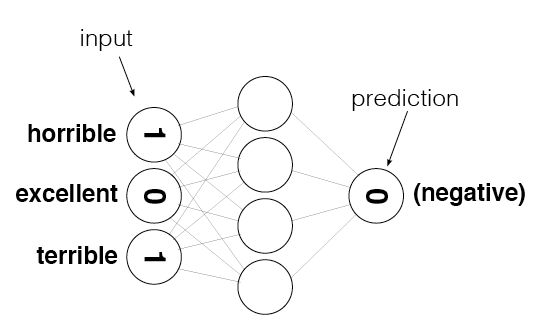

In [31]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

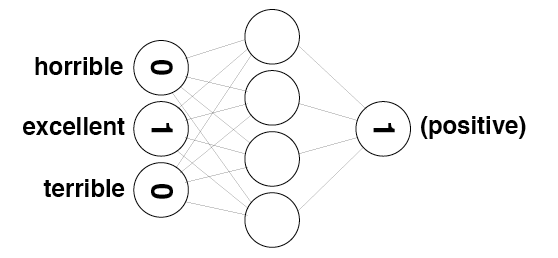

In [32]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

In [33]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [34]:
list(vocab)

['',
 'wilkes',
 'rahs',
 'chandeliers',
 'hughie',
 'bribes',
 'cele',
 'municipalians',
 'shart',
 'longorria',
 'spades',
 'gadgets',
 'hockey',
 'haddonfield',
 'egomaniac',
 'gulzar',
 'deadening',
 'claiborne',
 'tigerland',
 'arrangements',
 'reb',
 'moneymaking',
 'shrills',
 'curtailed',
 'churning',
 'corben',
 'individualistic',
 'carly',
 'dykes',
 'ber',
 'bovary',
 'rinsing',
 'lifethe',
 'inverse',
 'subaru',
 'thehollywoodnews',
 'rancid',
 'encouraged',
 'cardona',
 'bagpipe',
 'soulmate',
 'irak',
 'ono',
 'spotlighting',
 'scraggly',
 'transunto',
 'truffles',
 'naista',
 'hoodwinks',
 'obi',
 'kasugi',
 'retrospect',
 'faucet',
 'disappointment',
 'elyse',
 'obliterated',
 'intersperses',
 'hamlet',
 'gaptoothed',
 'gonzolez',
 'corigliano',
 'chard',
 'lamonte',
 'emannuelle',
 'excorcist',
 'spliting',
 'hoopin',
 'cites',
 'operational',
 'skullduggery',
 'thrived',
 'hangdog',
 'santeria',
 'unhinged',
 'montana',
 'quotable',
 'remembering',
 'senki',
 'dareus'

In [35]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [36]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i

word2index

{'': 0,
 'wilkes': 1,
 'hughie': 4,
 'bribes': 5,
 'chandeliers': 3,
 'withheld': 71018,
 'longorria': 9,
 'spades': 10,
 'huh': 27297,
 'gadgets': 11,
 'rpgs': 64834,
 'haddonfield': 13,
 'egomaniac': 14,
 'gulzar': 15,
 'deadening': 16,
 'hoodlums': 32253,
 'sniffle': 49312,
 'claiborne': 17,
 'tigerland': 18,
 'arrangements': 19,
 'reb': 20,
 'moneymaking': 21,
 'quality': 65357,
 'churning': 24,
 'preschool': 49314,
 'shart': 8,
 'ber': 29,
 'bovary': 30,
 'rinsing': 31,
 'cele': 6,
 'militarize': 24566,
 'subaru': 34,
 'thehollywoodnews': 35,
 'petwee': 24562,
 'eyeboy': 62813,
 'smarts': 73275,
 'rancid': 36,
 'encouraged': 37,
 'cardona': 38,
 'scraggly': 44,
 'naista': 47,
 'ono': 42,
 'spotlighting': 43,
 'wain': 61676,
 'truffles': 46,
 'hoodwinks': 48,
 'obi': 49,
 'retrospect': 51,
 'disappointment': 53,
 'hockey': 12,
 'elyse': 54,
 'employer': 61679,
 'hamlet': 57,
 'intersperses': 56,
 'gaptoothed': 58,
 'shill': 28693,
 'gonzolez': 59,
 'corigliano': 60,
 'gases': 49317

In [37]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent \
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for s in review.split(' '):
        layer_0[0][word2index[word]] += 1
        
update_input_layer(reviews[0])

In [38]:
layer_0

array([[   0.,    0.,    0., ...,    0.,    0.,  185.]])

In [39]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    if label == 'POSITIVE':
        return 1
    else:
        return 0

In [40]:
labels[0]

'POSITIVE'

In [41]:
get_target_for_label(labels[0])

1

In [42]:
labels[1]

'NEGATIVE'

In [43]:
get_target_for_label(labels[1])

0